In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers.merge import concatenate
from keras.models import Sequential
from keras.layers import Dense , Dropout, Activation, Flatten, Conv2D, MaxPool2D, MaxPooling2D, concatenate , BatchNormalization, AveragePooling2D, Input, GlobalAveragePooling2D

from keras import backend as K 
from keras.utils import np_utils
import math 
from tensorflow.keras.optimizers import SGD 
from keras.callbacks import LearningRateScheduler

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import shutil
from keras.models import Model

In [2]:
DATADIR = "/content/drive/MyDrive/FYP Project/dataset"
CATEGORIES = ["NEGATIVE","NEUTRAL","POSITIVE"]

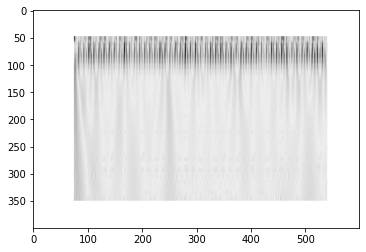

In [3]:
for category in CATEGORIES:
  path = os.path.join('/content/drive/MyDrive/FYP Project/dataset/train', category) # path to any of three
  for img in os.listdir(path):
    train_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(train_array, cmap = 'gray')
    plt.show()
    break
  break


In [4]:
print(train_array.shape)

(400, 600)


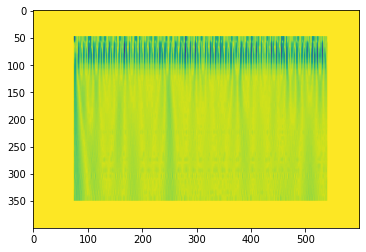

In [5]:
for category in CATEGORIES:
  path = os.path.join('/content/drive/MyDrive/FYP Project/dataset/test', category) # path to any of three
  for img in os.listdir(path):
    test_array = cv2.imread(os.path.join(path, img))[...,::-1]
    plt.imshow(train_array)
    plt.show()
    break
  break

In [6]:
print(test_array.shape)

(400, 600, 3)


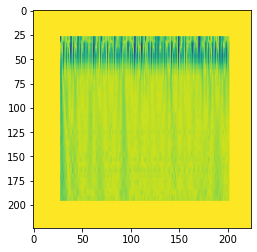

In [7]:
img_size=224
new_array = cv2.resize(train_array,(img_size,img_size))
plt.imshow(new_array)
plt.show()

In [8]:
training_data = []
def create_training_data():
  for category in CATEGORIES:
    path = os.path.join('/content/drive/MyDrive/FYP Project/dataset/train', category) # path to any of three
    Class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path, img))[...,::-1]
      new_array = cv2.resize(img_array,(img_size,img_size))
      training_data.append([new_array, Class_num])
create_training_data()

In [9]:
print(len(training_data))

1599


In [10]:
testing_data = []
def create_testing_data():
  for category in CATEGORIES:
    path = os.path.join('/content/drive/MyDrive/FYP Project/dataset/test', category) # path to any of three
    Class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path, img))[...,::-1]
      new_array = cv2.resize(img_array,(img_size,img_size))
      testing_data.append([new_array, Class_num])
create_testing_data()

In [11]:
print(len(testing_data))

533


In [12]:
import random

random.shuffle(training_data)
random.shuffle(testing_data)

In [13]:
for sample in testing_data[:10]:
  print(sample[1])

1
2
1
2
0
2
1
1
2
1


In [14]:
X_train = []
Y_train = []
X_test = []
Y_test = []

In [15]:
for features, label in training_data:
  X_train.append(features)
  Y_train.append(label)
X_train = np.array(X_train).reshape(-1, img_size,img_size, 3)


for features, label in testing_data:
  X_test.append(features)
  Y_test.append(label)
X_test = np.array(X_test).reshape(-1, img_size,img_size, 3)

In [16]:
print(len(Y_test))

533


In [17]:
X_train = X_train/255.0
X_test = X_test/255.0
X_train= np.asarray(X_train)
Y_train= np.asarray(Y_train)
X_test = np.asarray(X_test)
Y_test = np.asarray(Y_test)

In [18]:
model = Sequential()
model.add(Conv2D(64, (3,3) , input_shape = X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(3))
model.add(Activation("sigmoid"))

loss_fn = keras.losses.SparseCategoricalCrossentropy()

model.compile(loss=loss_fn,
              optimizer="adam",
              metrics=["accuracy"])


model.fit(X_train , Y_train , batch_size=32,epochs=10, validation_data=(X_test,Y_test))

Epoch 1/10
50/50 [==============================] - 17s 109ms/step - loss: 4.4108 - accuracy: 0.5497 - val_loss: 0.9277 - val_accuracy: 0.6529
Epoch 2/10
50/50 [==============================] - 4s 79ms/step - loss: 0.6731 - accuracy: 0.7017 - val_loss: 0.6249 - val_accuracy: 0.7598
Epoch 3/10
50/50 [==============================] - 4s 79ms/step - loss: 0.5401 - accuracy: 0.7805 - val_loss: 0.4207 - val_accuracy: 0.8462
Epoch 4/10
50/50 [==============================] - 4s 78ms/step - loss: 0.3874 - accuracy: 0.8305 - val_loss: 0.4161 - val_accuracy: 0.8499
Epoch 5/10
50/50 [==============================] - 4s 79ms/step - loss: 0.3533 - accuracy: 0.8562 - val_loss: 0.3068 - val_accuracy: 0.8780
Epoch 6/10
50/50 [==============================] - 4s 78ms/step - loss: 0.2797 - accuracy: 0.8818 - val_loss: 0.3692 - val_accuracy: 0.8668
Epoch 7/10
50/50 [==============================] - 4s 78ms/step - loss: 0.3006 - accuracy: 0.8780 - val_loss: 0.5319 - val_accuracy: 0.8011
Epoch 8/10


In [19]:
model.evaluate(X_test, Y_test)

17/17 [==============================] - 1s 31ms/step - loss: 0.3514 - accuracy: 0.8762


[0.3513716161251068, 0.8761726021766663]

In [20]:
j = random.randint(0,(len(X_test)))
j

172

In [21]:
Y_test[j]

1

In [22]:
pred = model.predict(X_test[j].reshape(-1, img_size,img_size, 3))
label=pred.argmax()
print(label)

1


In [23]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (224, 224, 3), include_top = False, weights = "imagenet")

In [24]:
base_model.trainable = False

In [25]:
model = tf.keras.Sequential([base_model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.Dense(2, activation="softmax")                                     
                                ])

In [28]:
base_learning_rate = 0.00001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(X_train,Y_train,epochs = 10 , validation_data = (X_test, Y_test))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
50/50 [==============================] - 8s 102ms/step - loss: nan - accuracy: 0.3277 - val_loss: nan - val_accuracy: 0.3321
Epoch 2/10
50/50 [==============================] - 3s 61ms/step - loss: nan - accuracy: 0.3321 - val_loss: nan - val_accuracy: 0.3321
Epoch 3/10
50/50 [==============================] - 3s 61ms/step - loss: nan - accuracy: 0.3321 - val_loss: nan - val_accuracy: 0.3321
Epoch 4/10
50/50 [==============================] - 3s 61ms/step - loss: nan - accuracy: 0.3321 - val_loss: nan - val_accuracy: 0.3321
Epoch 5/10
50/50 [==============================] - 3s 61ms/step - loss: nan - accuracy: 0.3321 - val_loss: nan - val_accuracy: 0.3321
Epoch 6/10
50/50 [==============================] - 3s 61ms/step - loss: nan - accuracy: 0.3321 - val_loss: nan - val_accuracy: 0.3321
Epoch 7/10
50/50 [==============================] - 3s 61ms/step - loss: nan - accuracy: 0.3321 - val_loss: nan - val_accuracy: 0.3321
Epoch 8/10
50/50 [==============================] - 3s

In [32]:
predictions = model.predict(X_test)
predictions = predictions.reshape(1,-1)[0]
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test, predictions, target_names = ['Rugby (Class 0)','Soccer (Class 1)']))

TypeError: ignored